<a href="https://colab.research.google.com/github/ananyamanan/Fake_news_detection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read the dataset from the local file system
df = pd.read_csv('news.csv')

# Display the first few rows of the DataFrame
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
# Convert the label attribute into numeric format
df['label'] = df['label'].astype('category').cat.codes

# Display the updated DataFrame
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [ ]:
import nltk

# Create a stemming object
stemmer = nltk.stem.PorterStemmer()

# Apply stemming to the 'text' column
df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Print the updated DataFrame
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"daniel greenfield, a shillman journal fellow a...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,googl pinterest digg linkedin reddit stumbleup...,0
2,3608,Kerry to go to Paris in gesture of sympathy,u.s. secretari of state john f. kerri said mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— kayde king (@kaydeeking) novemb 9, 2016 the ...",0
4,875,The Battle of New York: Why This Primary Matters,it' primari day in new york and front-runn hil...,1
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,the state depart told the republican nation co...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,the ‘p’ in pb should stand for ‘plutocratic’ o...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,anti-trump protest are tool of the oligarchi ...,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","addi ababa, ethiopia —presid obama conven a me...",1


In [ ]:
# Apply the wordopt function to the 'text' column
df['text'] = df['text'].apply(wordopt)

# Display the updated DataFrame
df

NameError: name 'wordopt' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the 'text' column and transform it into a matrix of TF-IDF features
X = vectorizer.fit_transform(df['text'])

# Get the target variable
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (5068, 67659) (5068,)
Testing set shape: (1267, 67659) (1267,)


In [ ]:
# Train a Naive Bayes classifier on the training data
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predict the labels for the test data
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

NameError: name 'X_train_tfidf' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_tfidf)

# Print the accuracy score
print("Accuracy:", clf.score(X_test_tfidf, y_test))

NameError: name 'X_train_tfidf' is not defined

In [ ]:
# prompt: apply precision for Decision tree classifier for the given dataset

from sklearn.metrics import precision_score

# Calculate the precision score for the Decision Tree classifier
precision = precision_score(y_test, y_pred, average='macro')

# Print the precision score
print("Precision:", precision)


NameError: name 'y_test' is not defined

In [ ]:
from sklearn.svm import SVC

# Create a SVC object
clf_svm = SVC()

# Fit the classifier to the training data
clf_svm.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_svm = clf_svm.predict(X_test_tfidf)

# Print the accuracy score
print("Accuracy:", clf_svm.score(X_test_tfidf, y_test))

Accuracy: 0.9261363636363636


In [ ]:
# Import the LinearRegression model
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_reg = reg.predict(X_test_tfidf)

# Print the accuracy score
print("Accuracy:", reg.score(X_test_tfidf, y_test))

Accuracy: 0.6576030846256664


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB object
clf_mnb = MultinomialNB()

# Fit the classifier to the training data
clf_mnb.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_mnb = clf_mnb.predict(X_test_tfidf)

# Print the accuracy score
print("Accuracy:", clf_mnb.score(X_test_tfidf, y_test))

Accuracy: 0.8049242424242424


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
clf_lr = LogisticRegression()

# Fit the classifier to the training data
clf_lr.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_lr = clf_lr.predict(X_test_tfidf)

# Print the accuracy score
print("Accuracy:", clf_lr.score(X_test_tfidf, y_test))

Accuracy: 0.9109848484848485


In [ ]:
# Import the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
clf_rf = RandomForestClassifier()

# Fit the classifier to the training data
clf_rf.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_rf = clf_rf.predict(X_test_tfidf)

# Print the accuracy score
print("Accuracy:", clf_rf.score(X_test_tfidf, y_test))

Accuracy: 0.9053030303030303


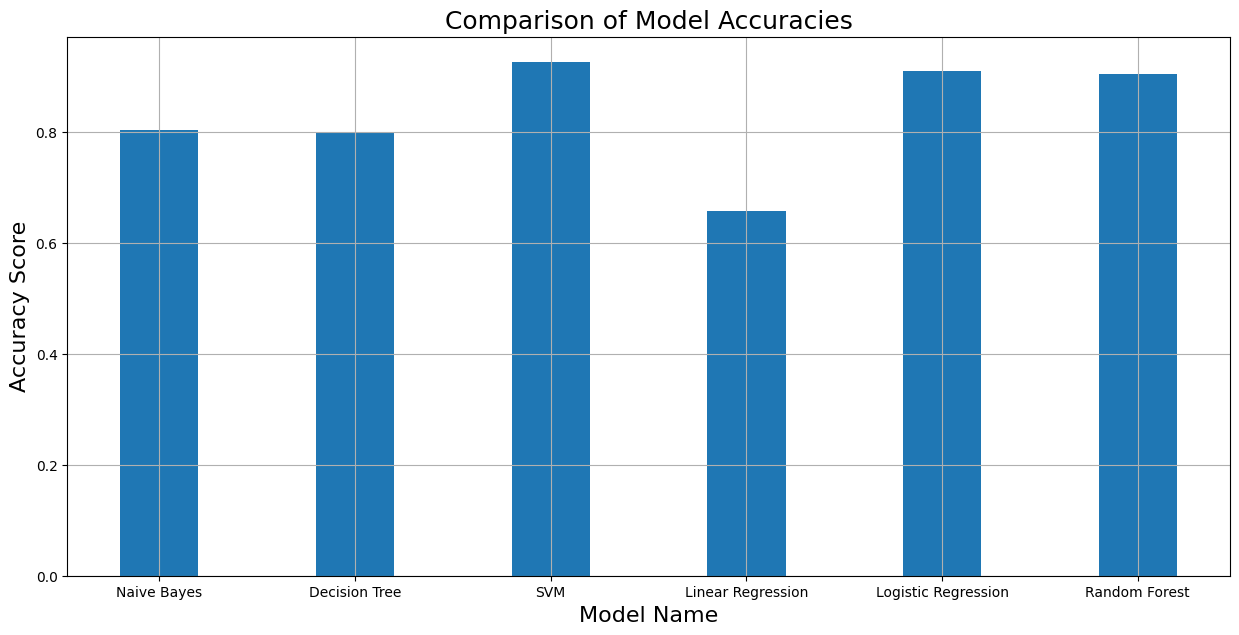

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create a list of model names
model_names = ['Naive Bayes', 'Decision Tree', 'SVM', 'Linear Regression', 'Logistic Regression', 'Random Forest']

# Create a list of accuracy scores
accuracy_scores = [0.8049242424242424, 0.7998737373737373, 0.9261363636363636, 0.6576030846256664, 0.9109848484848485, 0.9053030303030303]

# Create a bar chart
plt.figure(figsize=(15, 7))
plt.bar(model_names, accuracy_scores, width=0.4)

# Add labels and title
plt.xlabel("Model Name", fontsize=16)
plt.ylabel("Accuracy Score", fontsize=16)
plt.title("Comparison of Model Accuracies", fontsize=18)

# Add grid and show the plot
plt.grid(True)
plt.show()

In [ ]:
# prompt: apply tf-idf algorithm on the given dataset and print the entire column/row

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Print the entire TF-IDF matrix
print(tfidf_matrix)


  (0, 20169)	0.014178228995882907
  (0, 18853)	0.009272970141159279
  (0, 9478)	0.014151936756099957
  (0, 2306)	0.021002759070217543
  (0, 29229)	0.020971160535555908
  (0, 9970)	0.02373789102685452
  (0, 35452)	0.01739914666626697
  (0, 11488)	0.015903774476540594
  (0, 7360)	0.00851757554951921
  (0, 54591)	0.01681725296153299
  (0, 41241)	0.010445411064565417
  (0, 15571)	0.017943875463470493
  (0, 42123)	0.018847229406544267
  (0, 60169)	0.00943587772821063
  (0, 66227)	0.023232767820230864
  (0, 56882)	0.014191435022357902
  (0, 34685)	0.008473013319232815
  (0, 37735)	0.008879850243481452
  (0, 52895)	0.01869543128192668
  (0, 62044)	0.021839533627909375
  (0, 48810)	0.021956440574128107
  (0, 12613)	0.01996403366596103
  (0, 6194)	0.01148458488643172
  (0, 57065)	0.015510228181162313
  (0, 10714)	0.02504773510038326
  :	:
  (6334, 46170)	0.013537432252378223
  (6334, 23833)	0.03604699183792198
  (6334, 57284)	0.01396094413508426
  (6334, 10081)	0.041850073029148845
  (6334, 718